In [1]:
4+2

6

In [2]:
print("hello")

hello


In [3]:
# prompt: load the dataset here to implent ml

import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('/content/loan_prediction.csv')

# Display the first 5 rows of the dataframe to verify
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
ML flow a) Business understanding(Usecase-Loan Prediction,Supervised,Classification)
b)Data understanding
c)Data Preparation
d)Modelling
e)Evaluation
f)Deployment

In [4]:
# prompt: Show the code to display missing values

# Show missing values using .isnull().sum()
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# prompt: data types

# Get data types of each column
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [6]:
# prompt: drop loanid

# Drop the 'Loan_ID' column as it is not useful for prediction
df = df.drop('Loan_ID', axis=1)

# Verify the column has been dropped
print(df.head())

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3 

In [7]:
# prompt: shape

df.shape

(614, 12)

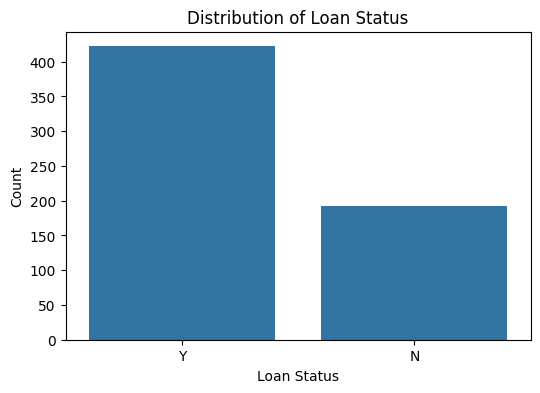

In [8]:
# prompt: create a chart for loan status

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary libraries are imported
# import pandas as pd # Already imported in preceding code
# import matplotlib.pyplot as plt # Now imported
# import seaborn as sns # Now imported

# Create a countplot for 'Loan_Status'
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

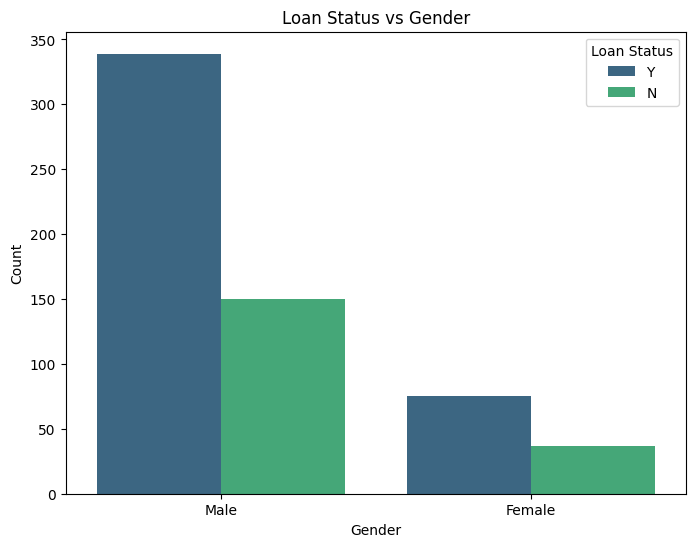

In [9]:
# prompt: chart for loan status vs gender

# Create a countplot for 'Gender' vs 'Loan_Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan Status vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

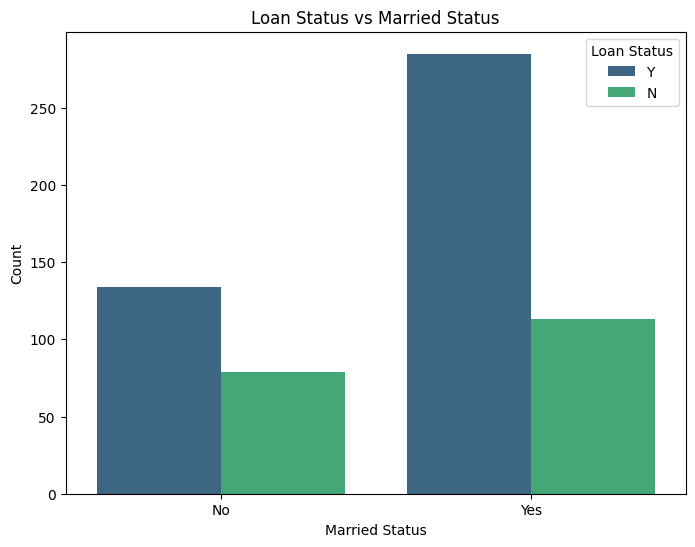

In [10]:
# prompt: chart for married vs loan status

# Create a countplot for 'Married' vs 'Loan_Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan Status vs Married Status')
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

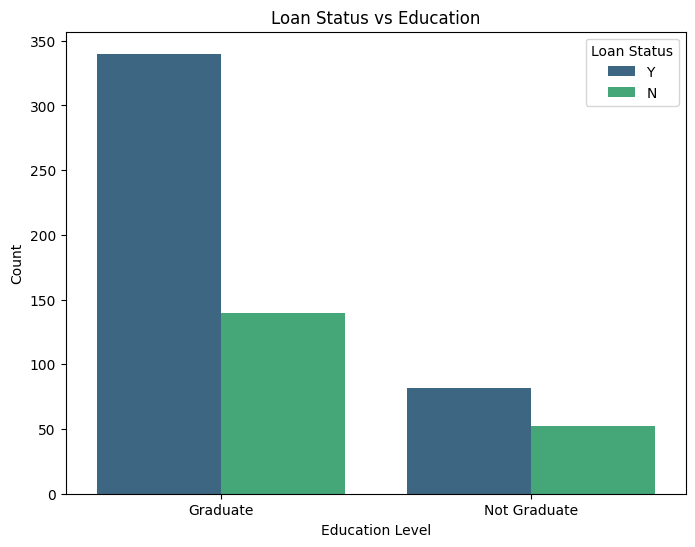

<ipython-input-11-a95e9cefdfea>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='viridis')


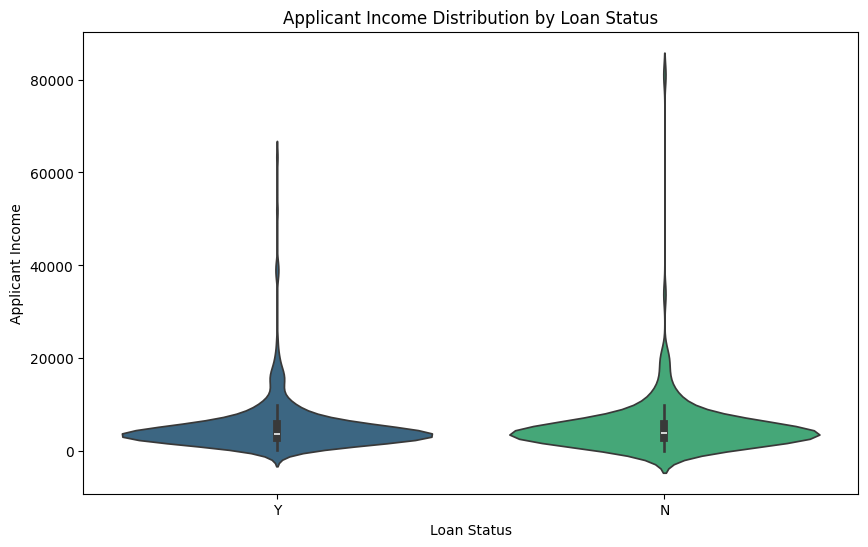

In [11]:
# prompt: chart for education and applicant columns

# Create a countplot for 'Education' vs 'Loan_Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='viridis')
plt.title('Loan Status vs Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

# Create a scatter plot for 'ApplicantIncome' vs 'Loan_Status' (can be tricky for categorical hue, using violin plot instead)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='viridis')
plt.title('Applicant Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

In [ ]:
## Missing values
## Treating the categorical columns->Encoding

In [13]:
# prompt: Handle missing values

import warnings
warnings.filterwarnings('ignore')
# Handling Missing values

# Impute 'Gender' with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Impute 'Married' with the mode
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

# Impute 'Dependents' with the mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

# Impute 'Self_Employed' with the mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Impute 'Credit_History' with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Impute numerical columns 'LoanAmount' and 'Loan_Amount_Term' with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Verify missing values are handled
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
# prompt: remove warnings


In [16]:
# prompt: label encoding for all categorical columns

from sklearn.preprocessing import LabelEncoder

# Select categorical columns (excluding the target variable 'Loan_Status')
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove the target variable 'Loan_Status' if it's in the list
if 'Loan_Status' in categorical_cols:
    categorical_cols.remove('Loan_Status')

# Initialize LabelEncoder
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Also encode the target variable 'Loan_Status'
label_encoders['Loan_Status'] = LabelEncoder()
df['Loan_Status'] = label_encoders['Loan_Status'].fit_transform(df['Loan_Status'])

# Display the first few rows of the dataframe to verify the encoding
print(df.head())

# Display the data types to confirm categorical columns are now numerical
df.dtypes

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Accuracy: 0.7560975609756098
Confusion Matrix:
[[18 25]
 [ 5 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



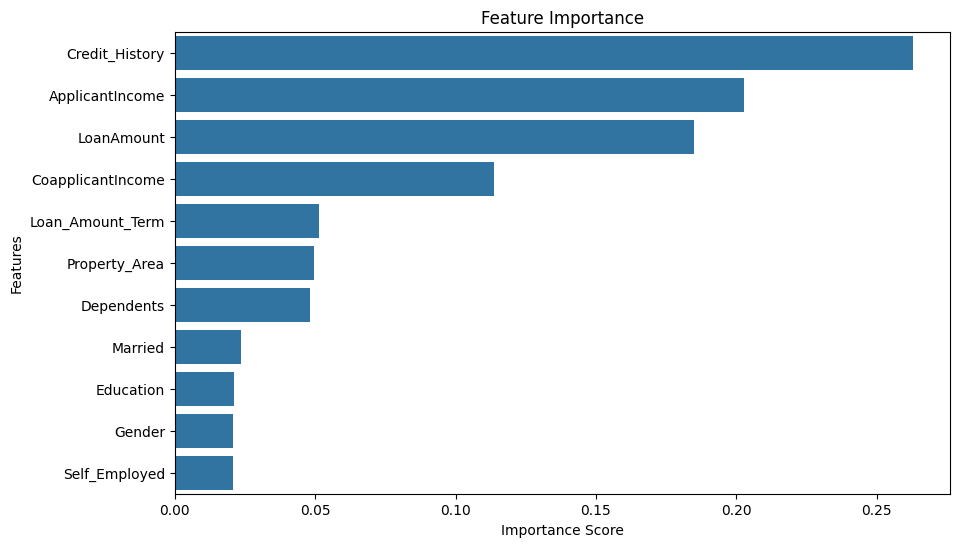

In [17]:
# prompt: Build a ml model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Feature Importance (optional)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
